# Basis and Frequencies

In [1]:
# import necessary packages

from os.path import dirname, join as pjoin
from scipy.io import wavfile
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fftfreq, dst, idst

from IPython.display import Audio
from IPython.display import display

# Plotting functions

In [2]:
def plot_signal(data, samplerate = 44100):
    length = data.shape[0] / samplerate
    time = np.linspace(0., length, data.shape[0])
    plt.plot(time, data[:, 0], label="Left channel")
    plt.plot(time, data[:, 1], label="Right channel")
    plt.legend(loc=2)
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.show()

def plot_mono_signal(signal, samplerate, xlim = -1):
    length = signal.shape[0] / samplerate
    time = np.linspace(0., length, signal.shape[0])
    plt.plot(time, signal)
    if xlim != -1:
        plt.xlim(0, xlim)
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.show()

def plot_spectrum(rc, lc, N, T):
    xf = fftfreq(N, T)[:N//2]
    plt.plot(xf, 2.0/N * np.abs(rc[0:N//2]), label="Right channel")
    plt.plot(xf, 2.0/N * np.abs(lc[0:N//2]), label="Left channel")
    plt.xscale('log')
    plt.xlim(20, 2e4)
    plt.legend(loc=2)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Coefficient")
    plt.grid()
    plt.show()

# Simple signal example and relationship to the course material

It turns out that we can think of audio signals as vectors, where each entry dictates the position of your speaker. And the moving of the speaker back and fourth in different ways is what makes the air move so that we hear different sounds. The simplest example is just one single note which is a signal that is just a sine function. As displayed below. Note that the oscillations are so fast that we really need to zoom in in order to visualize it.

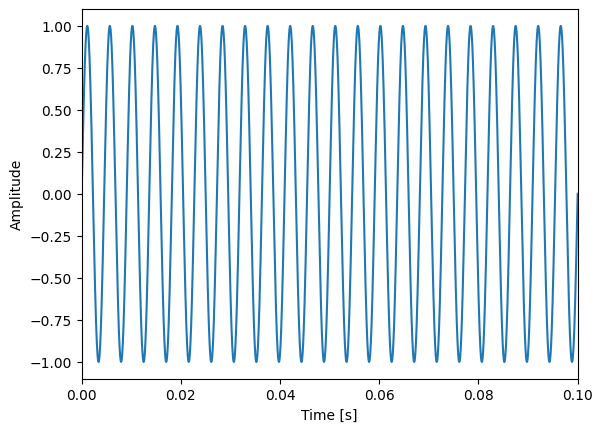

In [3]:
rate = 44100
t = np.linspace(0,5,rate*5)
a_440 = np.sin(2*np.pi*220*t)
plot_mono_signal(a_440, rate, xlim=0.1)

We can hear the audio that is created by this signal. It should be the note A. In real world instruments, the signal is not just the one note, but it also has a series of other notes hidden in it that give the intstrument's sound its character. Careful with the volume!

In [4]:
# create wav file
scipy.io.wavfile.write('a440.wav', rate, 0.2 * a_440)
# download the wav files on your computer to listen to them

### Signals, frequencies and basis

When we have a sound signal, we can decompose into its sine parts, allowing us to understand a signal in terms of its frequencies. In fact, what we are really doing is expressing a signal vector in terms of a convenient basis. This basis is the collection of different sines with different frequencies. It turns out that, if we choose the correct inner product on the space $\mathbb{R}^N$, where $N$ is the number of entries in the signal vector, then this collection of sines will form an *orthonormal basis* for the space of signals with $N$ entries. This makes it really easy to express signals in terms of its frequencies and manipulate them in any way we want.

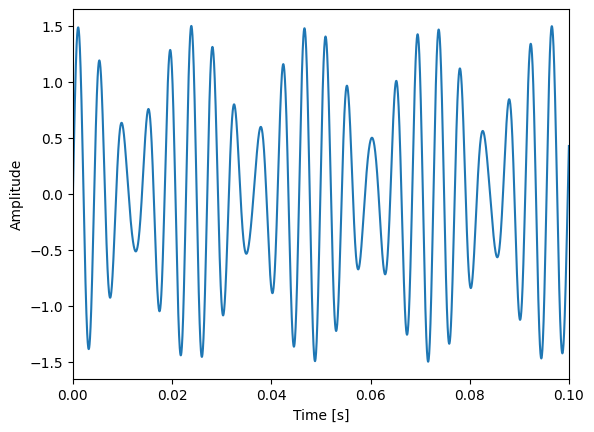

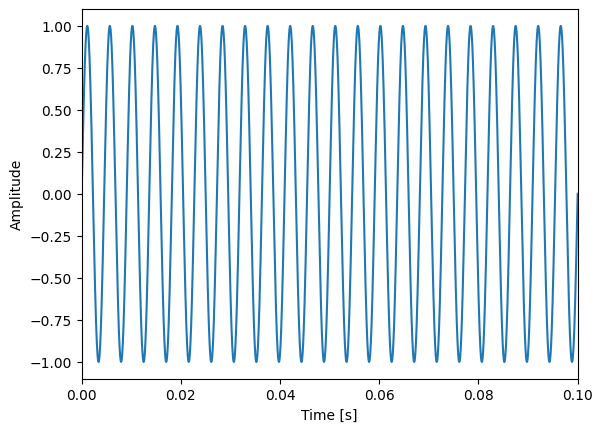

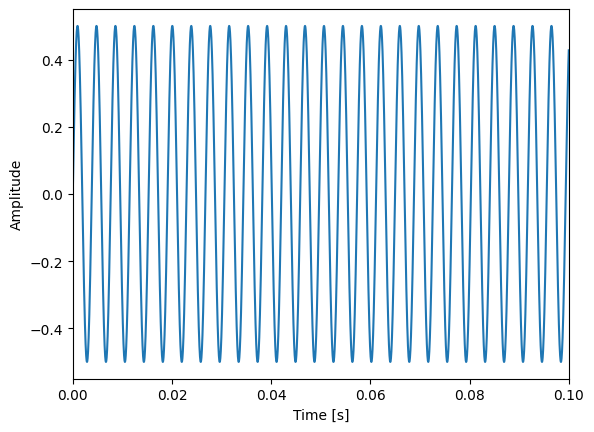

In [5]:
N = rate*5
# sample spacing
T = 1.0 / rate
t = np.linspace(0,5,N)
u = a_440
v = np.sin(2*np.pi*261.63*t) # note C
# linear combination of the signals for notes A and C
# note the coefficients on the note A vector and note C vector
simple_signal =  u + 0.5*v
plot_mono_signal(simple_signal, rate, xlim=0.1)
plot_mono_signal(u, rate, xlim=0.1)
plot_mono_signal(0.5*v, rate, xlim=0.1)

The signal above is a linear combination of the notes A and C. The coeffient on the note A is 1, and the coefficient on the note C is 0.5. Let's hear the signal below.

In [6]:
scipy.io.wavfile.write('simple_signal.wav', rate, 0.2 * simple_signal)
scipy.io.wavfile.write('c523.wav', rate, 0.2 * v)
# download the wav files on your computer to listen to them

Which note do you think is more present in the simple signal? How does that relate to the coefficients?

**TODO write your answer here**
Note A (A4, 440 Hz) is more reflected than note C (C5, 261.63 Hz) due to the combination of their coefficients. Note A still has its full amplitude - coefficient of 1 whereas note C is reduced to half - coefficient of 0.5. This makes note A the dominant sound in the audio.

Because of this basis interpretation and the fact that we can choose an inner product on $\mathbb{R}^N$ so that the sine signals form an orthonormal basis, we can denote the basis by $\mathbf{s}_1,..., \mathbf{s}_N$ (why do we know there will be $N$ of them?). Then any audio $\mathbf{a}$ will be expressed as:

$$\mathbf{a} = c_1 \mathbf{s}_1 + ... + c_N\mathbf{s}_N $$

but because we have an inner product that makes the basis orthonormal, we can easily determine the coeffients $c_1,...c_N$ as $c_i = \langle \mathbf{a} , \mathbf{s}_i\rangle_{S}$ where $\langle \cdot , \cdot \rangle_{S}$ is our chosen signal inner product. Then, we have that:

$$\mathbf{a} =  \langle \mathbf{a} , \mathbf{s}_1\rangle_{S} \,\,  \mathbf{s}_1 + ... +  \langle \mathbf{a} , \mathbf{s}_N\rangle_{S}\,\,\mathbf{s}_N $$

Let's define these below and see that they give us what we want, at least with the simple signal above.

In [7]:
def signal_inner_prod(u,v):
    return (2/N) * np.dot(u,v)

def signal_norm(u):
    ################ TODO your code here ###############
    # Write your signal norm function using the signal inner product
    # defined above
    return np.sqrt(signal_inner_prod(u, u))
    ####################################################


################### TODO your code here ################
# compute the coefficients for the linear combination using
# the signal inner product

coeff_u = signal_inner_prod(simple_signal, u)
coeff_v = signal_inner_prod(simple_signal, v)


# compute the relative error between the simple signal and
# the linear combination of u and v using the coefficients above

# relative_error = ...
linear_combination = coeff_u * u + coeff_v * v
relative_error = np.linalg.norm(simple_signal - linear_combination) / np.linalg.norm(simple_signal)
#######################################################


print(f"Inner product between u and v: {signal_inner_prod(u,v):.5f} (should be close to 0)")
print(f"Norm of u and v: {signal_norm(u):.5f}, {signal_norm(v):.5f} (should be close to 1)")
print(f"Coefficient in u and v to express the signal as a linear combination of them: {coeff_u:.5f}, {coeff_v:.5f}")
print(f"Relative error: {relative_error:.5f} (should be close to 0)")

Inner product between u and v: 0.00057 (should be close to 0)
Norm of u and v: 1.00000, 0.99997 (should be close to 1)
Coefficient in u and v to express the signal as a linear combination of them: 1.00028, 0.50054
Relative error: 0.00054 (should be close to 0)


# Applying these ideas to real audio

Now we will apply these ideas to understand how to manipulate real audio. In particular, we will understand how equalization of real audio works. That is, how to manipulate the frequencies of an audio signal. Auditively, we perceive low frequences as lower pitch sound (think like a bass, or a kick drum) and high frequencies as a high pitch sound (think like a guitar solo or a high hat drum). This means that when expressing a signal as a linear combination of the sine functions, if the signal is more lower pitched, the coeffieicients of the lower sine functions will be larger than the coefficient of the higher frequency sine functions.

In [8]:
# load the song
samplerate, data = wavfile.read("/content/Here_Comes_The_Sun.wav")
# separate the channels of the song
# the data has two signals, one for the left speaker and
# one for the right speaker
print(f"number of channels = {data.shape[1]}")
left_channel = data[:, 0]
right_channel = data[:, 1]
length = data.shape[0] / samplerate
print(f"length = {length:.2f}s")
# download the wav files on your computer to listen to them

number of channels = 2
length = 142.66s


<ipython-input-8-7f8fa209555f>:2: WavFileWarning: Reached EOF prematurely; finished at 25165824 bytes, expected 32759076 bytes from header.
  samplerate, data = wavfile.read("/content/Here_Comes_The_Sun.wav")


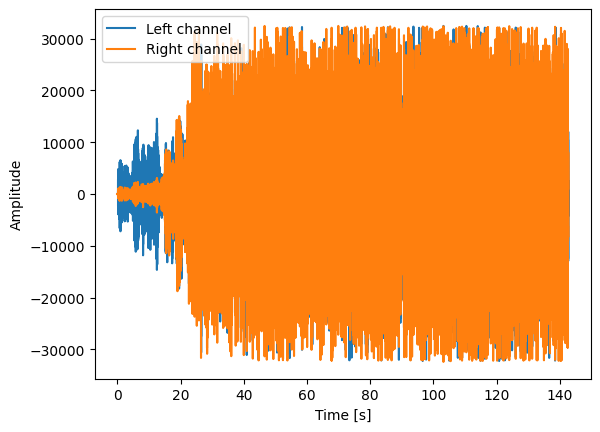

In [9]:
plot_signal(data)

### Manipulating audio

Think about what we can do to the audio singal array to increase or decrease the volume of the song. Think about what we do to a vector to increase its magnitude by a certain percentage.

In [10]:
# decrease the volume of the song by 50% by doing some operation on the
# vectors for the right and left channels for the song.
# listen to your new audio file to make sure that you achieved the expected result

############### TODO: YOUR CODE HERE #################

l_lower = left_channel * 0.5
r_lower = right_channel * 0.5

######################################################

# concatenate the two channels into one to turn it into a wav file
lower_vol_data = np.round(np.concatenate([l_lower.reshape([-1,1]), r_lower.reshape([-1,1])], axis=1)).astype(np.int16)
# create the wav file
scipy.io.wavfile.write('lower_volume_song.wav', samplerate, lower_vol_data)
# download the wav file on your computer to listen to it

### Computing the coefficients

To compute the coefficients in an efficient manner we use an algorithm called the Fast Fourier Transform, it's essentially a quick way to compute all the inner products that will determine the coefficients in the linear combination of the sine basis that expresses the signal in question. Since we are using sines as the basis (this will always work as long as the first entry of the signal is the number 0), we will use a special version of the Fourier Transform called the Direct Sine Transform. The details of this are out of the scope of this class but just know that this is an efficient way of computing all these coefficients.

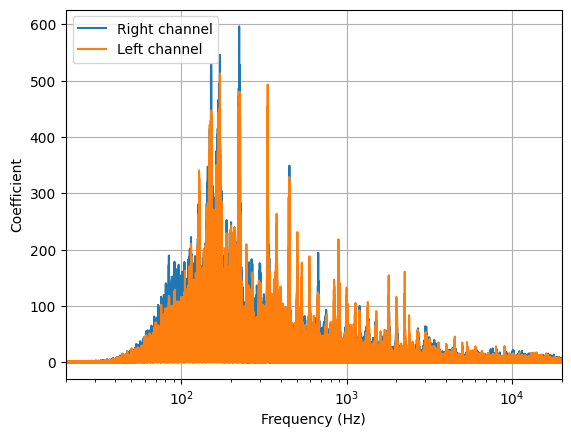

In [11]:
# get the coefficients of the linear combination and plot them with
# respect to the frequency of each basis element
N = data.shape[0] # dimension of the vector signal vectors
T = 1 / samplerate # time spacing between the signal entries
right_yf = dst(right_channel) # coefficients for the right channel
left_yf = dst(left_channel) # coefficients for the left channel
plot_spectrum(right_yf, left_yf, N, T)

### Eliminating high frequencies from the song

We will set the coefficients corresponding to the top 90% of the frequencies to be 0, leaving only the lowest 10% of the frequencies in the song.

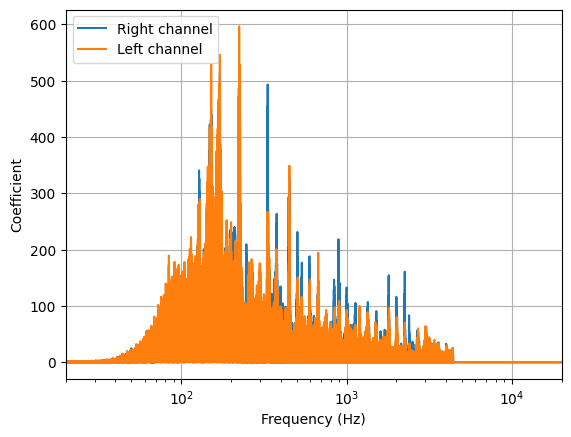

In [12]:
bi = int(0.1*N) # index of the first 10% coefficients
bass_mask = np.arange(N) < bi # an array that is 1 for the first 10% and 0 for the rest
# alternatively, we could have created bass_mask as follows:
# bass_mask = np.concatenate([np.ones(bi), np.zeros(N-bi)])

bass_ryf = right_yf * bass_mask # set the indices after the first 10% to zero
bass_lyf = left_yf * bass_mask # set the indices after the first 10% to zero
plot_spectrum(bass_lyf, bass_ryf, N, T)

#### How is this plot different from the spectrum plot for the original song? Does that make sense given what we did to the coefficients?

**TODO write your answer here**
The musicality of the second plot corresponds to the bass components and is markedly dissimilar to the original location of the song’s spectrum since the mask of bass equals more elevated frequency coefficients to zero. This leads to sharper peaks reaching down to the low frequencies in the graph and a flatter and less detailed surface on the equalizer diagram that does not have sharp impulses tied to high pitched sounds.

We will now go back from the cofficients to a new signal that is like the old one except that we got rid of all the  coefficients after the first 10% sine basis vectors. We do that by using the inverse Discrete Sine Transform, which is an efficient way to go from the coefficients to the signal.

In [13]:
# perform inverse sine transform to get the new signal
rbass = np.reshape(idst(bass_ryf),[-1,1]) # right channel
lbass = np.reshape(idst(bass_lyf),[-1,1]) # left channel
# concatenate the two channels into one to turn it into a wav file
bass_data = np.round(np.concatenate([lbass, rbass], axis=1)).astype(np.int16)
# create the wav file
scipy.io.wavfile.write('bass_test.wav', samplerate, bass_data)
# download the wav file on your computer to listen to it

### What differences do you observe between this version of the song and the original version? Why does that make sense in relation to what we did to the coefficients?

**TODO: write your answer here**
The vibrational frequencies of this song version spectrum is having a more intensive low frequency content than the original song and less clarity of the higher pitch tones in them. This is in consonance with our manipulation of the coefficients where we applied a bass mask to set to zero higher coefficients and used the inverse sine transform on the bass extracts. Therefore the new version brings out low pitches and contain the precepts of equalization meant specifically for balancing an audio across the various pitches.

### Atenuate low frequencies from the song

We will decrease the coefficients of the first 25% of the coefficients of the song by multiplying them by 0.2. This won't eliminate them but will make the presence of the lower frequencies smaller.

First let's do a test example with an array below.

In [14]:
test = 10 * np.ones(10)
N_test = test.shape[0]

########### TODO: write your code here ###########
# create an array called test_mask that will decrease
# the first 4 entries of an array by 70% do not create
# this array explicitly, you must use numpy functions to do it.
# Hint: Two ways of doing this:
# 1) look at the example where we eliminated the top frequencies
# and try to use np.arange to create two arrays, one that has ones
# on the last 6 entries and 0.3 on the first 4 entries.
# 2) You could also create two separate arrays and concatenate
# them if you prefer

# test_mask = ...
test_mask = np.concatenate([0.3 * np.ones(4), np.ones(N_test - 4)])

##################################################
print(test)
print(test * test_mask)

[10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
[ 3.  3.  3.  3. 10. 10. 10. 10. 10. 10.]


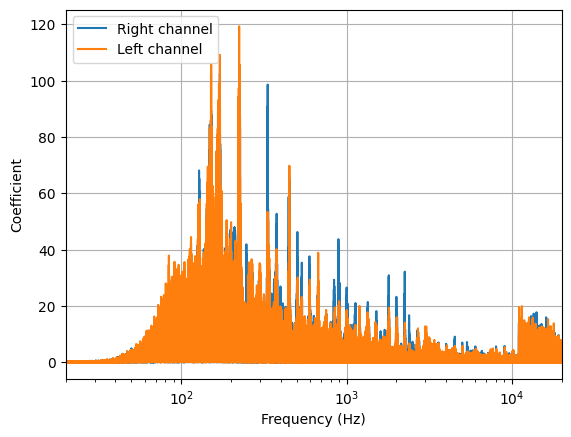

In [15]:
ti = int(0.25*N) # index of the first 25% coefficients

############# TODO: write your code here #####################
# create the trebble mask that will multiply the first ti (defined above)
# indices by 0.2. Hint: your work in the previous cell will be helpful

# trebble_mask = ...
trebble_mask = np.concatenate([0.2 * np.ones(ti), np.ones(N - ti)])

##############################################################
trebble_ryf = right_yf * trebble_mask # decrease the first 25% of coefficients by 80%
trebble_lyf = left_yf * trebble_mask # decrease the first 25% of coefficients by 80%
plot_spectrum(trebble_lyf, trebble_ryf, N, T)

In [16]:
# perform inverse sine transform to get the new signal
rtrebble = np.reshape(idst(trebble_ryf),[-1,1]) # right channel
ltrebble = np.reshape(idst(trebble_lyf),[-1,1]) # right channel
# concatenate the two channels into one to turn it into a wav file
trebble_data = np.round(np.concatenate([ltrebble, rtrebble], axis=1)).astype(np.int16)
# create the wav file
scipy.io.wavfile.write('trebble_test.wav', samplerate, trebble_data)
# download the wav files on your computer to listen to it

### What differences do you observe between this version of the song and the original version? Why does that make sense in relation to what we did to the coefficients?

**TODO: write your answer here**
This song version highlight the treble frequencies, It created a seeming balance by increasing overall instrument and vocal clarity for higher frequency sounds, such as cymbal cracks, string notes or vocals, over the original. This change happened because we used a treble mask which equalized the amplitude of the low frequencies and let the high frequencies take over the mix. This is done under the equality method where selective boost-cuts assist in the compensation of several bands of frequency, thus simplifying listening through placing emphasis on certain aspects of Music.

Good job! This process of manipulating frequencies of a song is called equalization. It is an important part of mixing a song and making sure that recordings sound good to our ears, and it can essentially all be understood using the tools we learned in linear algebra!